<a href="https://colab.research.google.com/github/sravanthig25/Employee-salary-prediction-AI/blob/main/Employee_salary_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
data = pd.read_csv('/content/Dataset.csv')
data.head()

,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,0,1,2,1,18,9,30,4,0,1,177,131,285000.0,2,1,3,10.0,4
1,2,0,3,0,1,27,23,11,6,2,0,177,131,250000.0,0,6,5,23.0,4
2,3,0,1,0,1,12,7,14,3,2,1,177,131,156000.0,0,6,5,7.0,12
3,4,0,1,2,1,6,4,15,5,2,1,130,101,1320000.0,2,4,4,6.0,9
4,5,0,2,2,6,21,21,11,3,1,3,175,44,78000.0,2,0,4,22.0,9


In [10]:
data

,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,0,1,2,1,18,9,30,4,0,1,177,131,2.850000e+05,2,1,3,10.0,4
1,2,0,3,0,1,27,23,11,6,2,0,177,131,2.500000e+05,0,6,5,23.0,4
2,3,0,1,0,1,12,7,14,3,2,1,177,131,1.560000e+05,0,6,5,7.0,12
3,4,0,1,2,1,6,4,15,5,2,1,130,101,1.320000e+06,2,4,4,6.0,9
4,5,0,2,2,6,21,21,11,3,1,3,175,44,7.800000e+04,2,0,4,22.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32610,89174,0,0,1,1,5,1,15,5,1,3,124,102,1.200000e+06,2,1,2,2.0,7
32611,89175,0,1,2,1,10,8,17,1,2,1,177,131,1.350000e+05,2,0,4,8.0,4
32612,89177,0,2,2,2,17,11,15,3,1,3,106,90,1.000000e+06,1,1,2,12.0,1
32613,89178,0,3,2,1,25,22,15,2,1,3,177,131,2.120210e+05,1,0,3,22.0,5


In [11]:
data.shape

(32615, 19)

In [12]:
data.describe()

,Unnamed: 0,MainBranch,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
count,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000,3.261500e+04,32615.000000,32615.000000,32615.000000,32615.000000,32615.000000
mean,41767.300629,0.114058,1.475333,1.011896,2.198068,15.249977,10.304737,14.301180,3.400153,1.226123,1.688119,112.055803,73.837958,3.066105e+16,1.137023,2.848475,3.487444,11.441852,5.705473
std,24822.256550,0.463803,0.950674,0.929234,1.811386,9.450674,8.209923,5.443715,2.114499,0.768296,1.028799,59.779365,43.984239,5.537214e+18,0.849008,2.536114,1.374306,8.829642,3.633957
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20745.000000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000,11.000000,2.000000,1.000000,1.000000,59.000000,41.000000,6.500000e+04,0.000000,0.000000,2.000000,5.000000,4.000000
50%,40434.000000,0.000000,1.000000,1.000000,1.000000,13.000000,8.000000,15.000000,3.000000,1.000000,1.000000,124.000000,48.000000,1.200000e+05,1.000000,4.000000,4.000000,9.000000,4.000000
75%,62130.500000,0.000000,2.000000,2.000000,2.000000,20.000000,14.000000,15.000000,5.000000,2.000000,3.000000,177.000000,131.000000,2.500000e+05,2.000000,6.000000,5.000000,16.000000,9.000000
max,89183.000000,2.000000,7.000000,3.000000,7.000000,51.000000,51.000000,33.000000,10.000000,3.000000,3.000000,184.000000,142.000000,1.000000e+21,2.000000,6.000000,5.000000,50.000000,12.000000


In [13]:
data.isna().sum()

,0
Unnamed: 0,0
MainBranch,0
Age,0
RemoteWork,0
EdLevel,0
YearsCode,0
YearsCodePro,0
DevType,0
OrgSize,0
PurchaseInfluence,0


In [14]:
print(data.OrgSize.value_counts())

OrgSize
5     7480
3     6771
2     4223
0     3952
4     2986
1     2821
7     2422
6     1427
8      356
9      162
10      15
Name: count, dtype: int64


In [15]:
print(data.Industry.value_counts())

Industry
4     13437
12     4964
1      3431
9      2998
7      1988
2      1694
10     1544
3       868
0       609
5       574
8       207
6       166
11      135
Name: count, dtype: int64


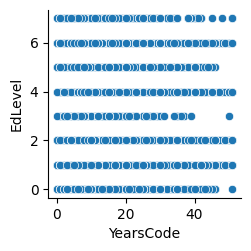

In [17]:
sns.pairplot(y_vars = 'EdLevel', x_vars = 'YearsCode' ,data = data)

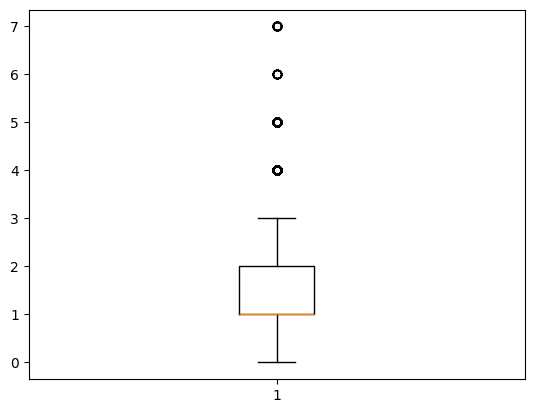

In [18]:
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['Age'])
plt.show()

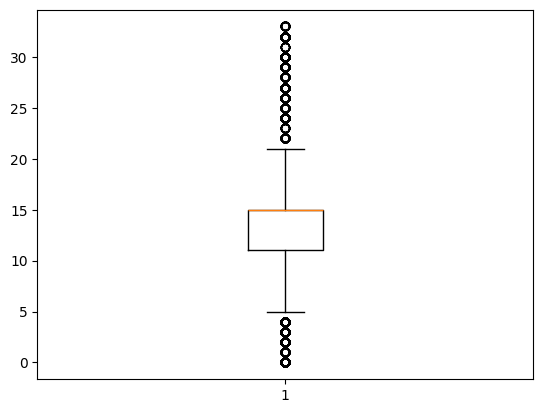

In [19]:
plt.boxplot(data['DevType'])
plt.show()

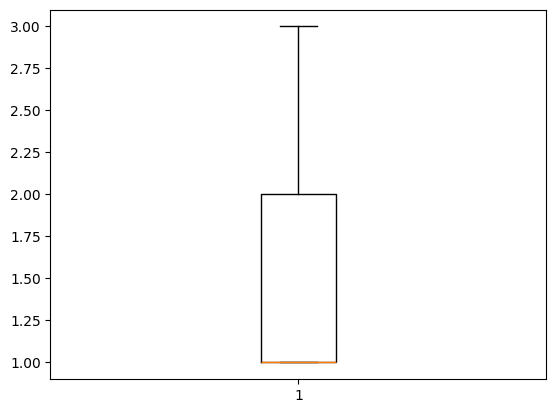

In [20]:
data=data[(data['Age']<=3)&(data['Age']>=1)]
plt.boxplot(data['Age'])
plt.show()

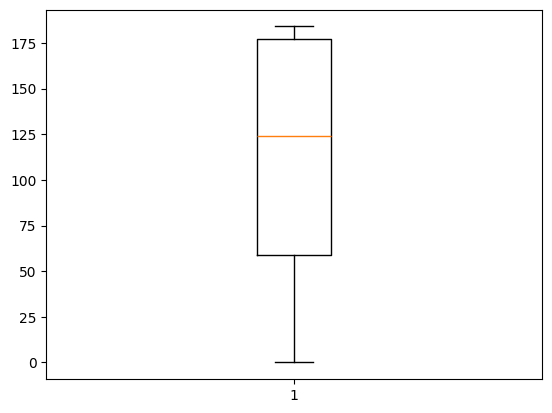

In [21]:
plt.boxplot(data['Country'])
plt.show()

In [22]:
data=data.drop(columns=['MainBranch'])# checking the correlation of the data


In [23]:
data

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,1,2,1,18,9,30,4,0,1,177,131,2.850000e+05,2,1,3,10.0,4
1,2,3,0,1,27,23,11,6,2,0,177,131,2.500000e+05,0,6,5,23.0,4
2,3,1,0,1,12,7,14,3,2,1,177,131,1.560000e+05,0,6,5,7.0,12
3,4,1,2,1,6,4,15,5,2,1,130,101,1.320000e+06,2,4,4,6.0,9
4,5,2,2,6,21,21,11,3,1,3,175,44,7.800000e+04,2,0,4,22.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32609,89172,3,1,6,38,22,15,5,1,3,154,41,3.554100e+04,2,0,0,24.0,4
32611,89175,1,2,1,10,8,17,1,2,1,177,131,1.350000e+05,2,0,4,8.0,4
32612,89177,2,2,2,17,11,15,3,1,3,106,90,1.000000e+06,1,1,2,12.0,1
32613,89178,3,2,1,25,22,15,2,1,3,177,131,2.120210e+05,1,0,3,22.0,5


In [24]:
data.corr()

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
Unnamed: 0,1.000000,-0.019609,-0.007608,-0.003205,-0.053876,-0.044702,0.010806,0.009129,0.007225,0.011409,0.012826,0.034257,-0.005518,0.074855,-0.039562,-0.037531,-0.033050,0.004832
Age,-0.019609,1.000000,0.034661,0.084535,0.703699,0.743863,0.052261,-0.005308,-0.032530,-0.070496,0.070509,0.037128,-0.004815,-0.081188,0.045002,0.029301,0.782779,0.012088
RemoteWork,-0.007608,0.034661,1.000000,0.013923,0.032227,0.054723,-0.004682,0.037195,-0.013514,0.003953,0.097716,0.160138,-0.000156,0.031699,0.000862,-0.010520,0.061229,-0.011201
EdLevel,-0.003205,0.084535,0.013923,1.000000,0.075435,0.082936,0.013925,0.011615,-0.035695,-0.046487,-0.052131,-0.073969,-0.003946,0.019187,0.009680,-0.016251,0.094732,0.009929
YearsCode,-0.053876,0.703699,0.032227,0.075435,1.000000,0.884927,0.077217,-0.011400,-0.062368,-0.119323,0.053487,0.013045,-0.003156,-0.129563,0.093905,0.050240,0.822447,-0.008781
YearsCodePro,-0.044702,0.743863,0.054723,0.082936,0.884927,1.000000,0.083656,-0.005238,-0.067180,-0.137529,0.061016,0.033506,-0.002098,-0.104252,0.070509,0.039402,0.903954,-0.010954
DevType,0.010806,0.052261,-0.004682,0.013925,0.077217,0.083656,1.000000,0.004307,-0.099351,-0.098140,0.013466,0.022099,-0.003617,0.021834,-0.023460,-0.025603,0.086516,0.020679
OrgSize,0.009129,-0.005308,0.037195,0.011615,-0.011400,-0.005238,0.004307,1.000000,-0.008849,-0.059022,-0.021847,-0.014081,0.004517,0.014044,-0.008717,-0.003896,-0.005414,-0.000410
PurchaseInfluence,0.007225,-0.032530,-0.013514,-0.035695,-0.062368,-0.067180,-0.099351,-0.008849,1.000000,-0.224259,0.012985,0.004549,-0.009489,-0.043041,-0.010255,0.034654,-0.068576,0.011920
TechList,0.011409,-0.070496,0.003953,-0.046487,-0.119323,-0.137529,-0.098140,-0.059022,-0.224259,1.000000,-0.006347,-0.009878,-0.003910,-0.076562,0.047283,0.047065,-0.133998,-0.003450


In [25]:
X = data['YearsCode']
y = data['Salary']
X_train,X_test,y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.shape

(19618,)

In [26]:
X_test.shape

(8408,)

In [27]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.898
Date:                Mon, 21 Jul 2025   Prob (F-statistic):              0.168
Time:                        16:26:19   Log-Likelihood:            -5.0275e+05
No. Observations:               19618   AIC:                         1.005e+06
Df Residuals:                   19616   BIC:                         1.006e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.319e+08   4.86e+08      1.712      0.0

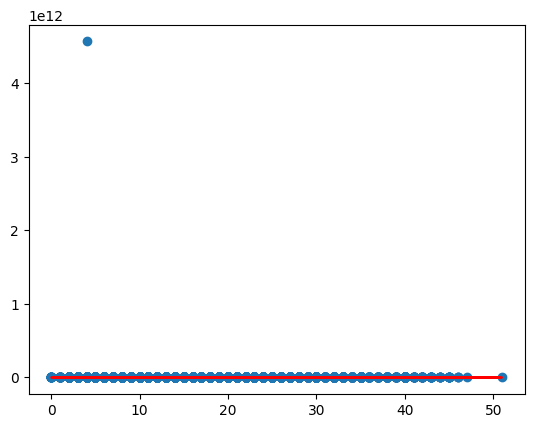

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 25200 + X_train * 9731.2038,'r')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()                       #create object
data['Salary']=encoder.fit_transform(data['Salary'])
data['YearsCodePro']=encoder.fit_transform(data['YearsCodePro'])
data['RemoteWork']=encoder.fit_transform(data['RemoteWork'])
data['DevType']=encoder.fit_transform(data['DevType'])
data['PurchaseInfluence']=encoder.fit_transform(data['PurchaseInfluence'])
data['OrgSize']=encoder.fit_transform(data['OrgSize'])
data['Industry']=encoder.fit_transform(data['Industry'])

In [30]:
data

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp,Industry
0,1,1,2,1,18,9,30,4,0,1,177,131,2.850000e+05,2,1,3,10.0,4
1,2,3,0,1,27,23,11,6,2,0,177,131,2.500000e+05,0,6,5,23.0,4
2,3,1,0,1,12,7,14,3,2,1,177,131,1.560000e+05,0,6,5,7.0,12
3,4,1,2,1,6,4,15,5,2,1,130,101,1.320000e+06,2,4,4,6.0,9
4,5,2,2,6,21,21,11,3,1,3,175,44,7.800000e+04,2,0,4,22.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32609,89172,3,1,6,38,22,15,5,1,3,154,41,3.554100e+04,2,0,0,24.0,4
32611,89175,1,2,1,10,8,17,1,2,1,177,131,1.350000e+05,2,0,4,8.0,4
32612,89177,2,2,2,17,11,15,3,1,3,106,90,1.000000e+06,1,1,2,12.0,1
32613,89178,3,2,1,25,22,15,2,1,3,177,131,2.120210e+05,1,0,3,22.0,5


In [31]:
x=data.drop(columns=['Industry'])
y=data['Industry']
x

,Unnamed: 0,Age,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,Country,Currency,Salary,AISelect,AISent,AIBen,WorkExp
0,1,1,2,1,18,9,30,4,0,1,177,131,2.850000e+05,2,1,3,10.0
1,2,3,0,1,27,23,11,6,2,0,177,131,2.500000e+05,0,6,5,23.0
2,3,1,0,1,12,7,14,3,2,1,177,131,1.560000e+05,0,6,5,7.0
3,4,1,2,1,6,4,15,5,2,1,130,101,1.320000e+06,2,4,4,6.0
4,5,2,2,6,21,21,11,3,1,3,175,44,7.800000e+04,2,0,4,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32609,89172,3,1,6,38,22,15,5,1,3,154,41,3.554100e+04,2,0,0,24.0
32611,89175,1,2,1,10,8,17,1,2,1,177,131,1.350000e+05,2,0,4,8.0
32612,89177,2,2,2,17,11,15,3,1,3,106,90,1.000000e+06,1,1,2,12.0
32613,89178,3,2,1,25,22,15,2,1,3,177,131,2.120210e+05,1,0,3,22.0


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

LogisticRegression Accuracy: 0.4130
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.00      0.00      0.00       635
           2       0.00      0.00      0.00       297
           3       0.00      0.00      0.00       156
           4       0.41      1.00      0.58      2316
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00       337
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00       494
          10       0.00      0.00      0.00       262
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00       834

    accuracy                           0.41      5606
   macro avg       0.03      0.08      0.04      5606
weighted avg       0.17      0.41      0.24      5606



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RandomForest Accuracy: 0.4071
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.17      0.03      0.05       635
           2       0.04      0.00      0.01       297
           3       0.66      0.27      0.38       156
           4       0.43      0.93      0.59      2316
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00        34
           7       0.17      0.01      0.02       337
           8       0.00      0.00      0.00        36
           9       0.26      0.04      0.07       494
          10       0.05      0.00      0.01       262
          11       0.00      0.00      0.00        20
          12       0.18      0.06      0.09       834

    accuracy                           0.41      5606
   macro avg       0.15      0.10      0.09      5606
weighted avg       0.28      0.41      0.28      5606



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


KNN Accuracy: 0.3045
              precision    recall  f1-score   support

           0       0.02      0.02      0.02        90
           1       0.10      0.11      0.10       635
           2       0.06      0.05      0.06       297
           3       0.18      0.06      0.09       156
           4       0.42      0.65      0.51      2316
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00        34
           7       0.08      0.02      0.03       337
           8       0.00      0.00      0.00        36
           9       0.10      0.05      0.06       494
          10       0.08      0.03      0.04       262
          11       0.00      0.00      0.00        20
          12       0.15      0.09      0.11       834

    accuracy                           0.30      5606
   macro avg       0.09      0.08      0.08      5606
weighted avg       0.23      0.30      0.25      5606



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVM Accuracy: 0.4149
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.00      0.00      0.00       635
           2       0.00      0.00      0.00       297
           3       0.83      0.06      0.12       156
           4       0.41      1.00      0.59      2316
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00        34
           7       0.00      0.00      0.00       337
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00       494
          10       0.00      0.00      0.00       262
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00       834

    accuracy                           0.41      5606
   macro avg       0.10      0.08      0.05      5606
weighted avg       0.19      0.41      0.25      5606



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GradientBoosting Accuracy: 0.4154
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.22      0.01      0.01       635
           2       0.00      0.00      0.00       297
           3       0.66      0.28      0.39       156
           4       0.42      0.98      0.59      2316
           5       0.11      0.01      0.02        95
           6       0.00      0.00      0.00        34
           7       0.38      0.02      0.03       337
           8       0.00      0.00      0.00        36
           9       0.26      0.01      0.03       494
          10       0.10      0.00      0.01       262
          11       0.00      0.00      0.00        20
          12       0.15      0.01      0.02       834

    accuracy                           0.42      5606
   macro avg       0.18      0.10      0.08      5606
weighted avg       0.29      0.42      0.26      5606



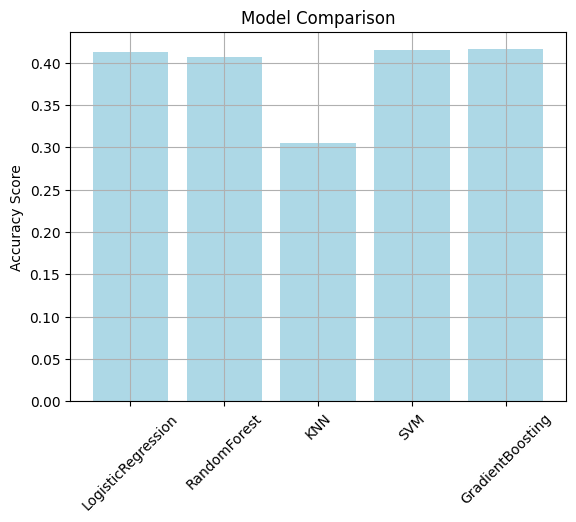

In [34]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='lightblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<Axes: ylabel='count'>

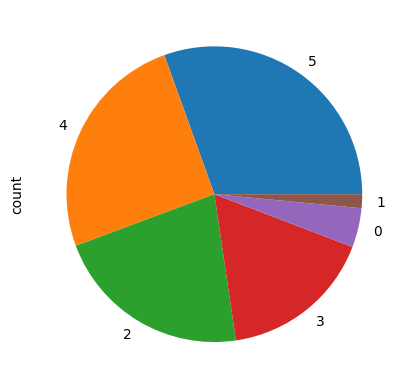

In [35]:
data['AIBen'].value_counts().sort_values(ascending=False).plot(kind="pie")

In [42]:
%%writefile employeesalary_prediction_app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set page configuration
st.set_page_config(page_title="Employee Salary Prediction", layout="wide")

# Sidebar for user input
st.sidebar.header("Employee Salary Prediction")
st.sidebar.write("Enter employee details to predict salary")

# Input fields in sidebar
years_experience = st.sidebar.slider("Years of Experience", 0.0, 20.0, 5.0, step=0.1)
education_level = st.sidebar.selectbox("Education Level", ["High School", "Bachelor's", "Master's", "PhD"])
age = st.sidebar.slider("Age", 18, 65, 30, step=1)
job_role = st.sidebar.selectbox("Job Role", ["Junior Developer", "Senior Developer", "Manager", "Director"])

# Encode education level and job role
education_mapping = {"High School": 1, "Bachelor's": 2, "Master's": 3, "PhD": 4}
job_role_mapping = {"Junior Developer": 1, "Senior Developer": 2, "Manager": 3, "Director": 4}
education_encoded = education_mapping[education_level]
job_role_encoded = job_role_mapping[job_role]

# Main content
st.title("Employee Salary Prediction Using Linear Regression")
st.write("This app predicts employee salaries based on experience, education, age, and job role.")

# Generate synthetic dataset
np.random.seed(42)
n_samples = 1000
data = {"YearsExperience": np.random.uniform(0, 20, n_samples),
    "EducationLevel": np.random.choice([1, 2, 3, 4], n_samples),
    "Age": np.random.randint(18, 65, n_samples),
    "JobRole": np.random.choice([1, 2, 3, 4], n_samples),
    "Salary": 30000 + 5000 * np.random.uniform(0, 20, n_samples) +
             10000 * np.random.choice([1, 2, 3, 4], n_samples) +
             500 * np.random.randint(18, 65, n_samples) +
             15000 * np.random.choice([1, 2, 3, 4], n_samples) +
             np.random.normal(0, 5000, n_samples)
}
df = pd.DataFrame(data)

# Display dataset preview
st.subheader("Dataset Preview")
st.write(df.head())

# Data preprocessing
X = df[["YearsExperience", "EducationLevel", "Age", "JobRole"]]
y = df["Salary"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

st.subheader("Model Performance")
st.write(f"Mean Squared Error: {mse:.2f}")
st.write(f"R² Score: {r2:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    "Feature": ["YearsExperience", "EducationLevel", "Age", "JobRole"],
    "Coefficient": model.coef_
})
st.subheader("Feature Importance")
st.write(feature_importance)

# Plot feature importance
fig, ax = plt.subplots()
sns.barplot(x="Coefficient", y="Feature", data=feature_importance, ax=ax)
st.pyplot(fig)

# Prediction for user input
input_data = np.array([[years_experience, education_encoded, age, job_role_encoded]])
input_scaled = scaler.transform(input_data)
predicted_salary = model.predict(input_scaled)[0]

st.subheader("Salary Prediction")
st.write(f"Predicted Salary: ${predicted_salary:,.2f}")

# Visualization of actual vs predicted salaries
st.subheader("Actual vs Predicted Salaries")
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.5)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel("Actual Salary")
ax.set_ylabel("Predicted Salary")
st.pyplot(fig)

Writing employeesalary_prediction_app.py
